In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_pickle(r"C:\Jupyter Projects\Machine Learning\IBM\Supervised ML\Linear Regression\boston_housing_clean.pickle")

In [8]:
boston_data = data['dataframe']

In [9]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Our target variable here is MEDV, so we will make it normally distributed if it is not

<Axes: xlabel='MEDV', ylabel='Density'>

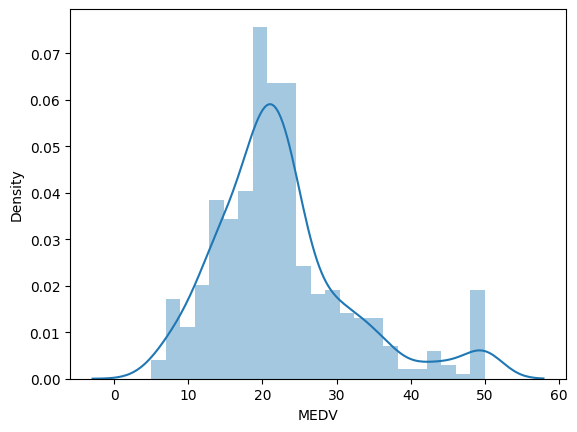

In [10]:
sns.distplot(boston_data.MEDV)

In [11]:
normaltest(boston_data.MEDV)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696098e-20)

The higher the pvalue, the feature is close to the normal distribution.

As you can see the pvalue is extremely low, so we will transform the values to more normally distribution.

Ways to transform:

* Log
* Square Root
* BoxCox

### Log Transformation

<Axes: xlabel='MEDV', ylabel='Density'>

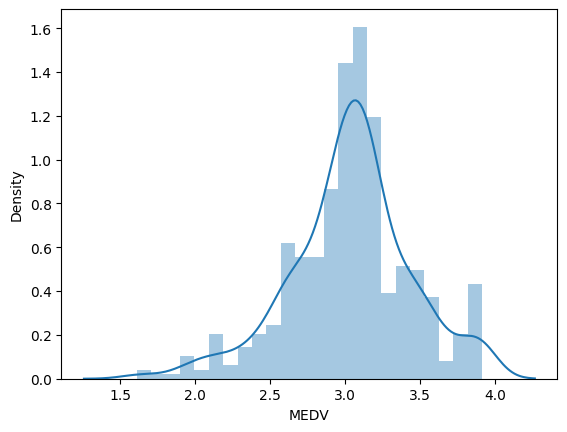

In [12]:
log_tran = np.log(boston_data.MEDV)
sns.distplot(log_tran)

In [13]:
normaltest(log_tran)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

The pvalue is still very low. Usually we fail to reject the null hypothesis if the pvalue > 0.05, more specifically, null hypothesis mentions that the data is normally distributed.

### Square Root Transformation

<Axes: xlabel='MEDV', ylabel='Density'>

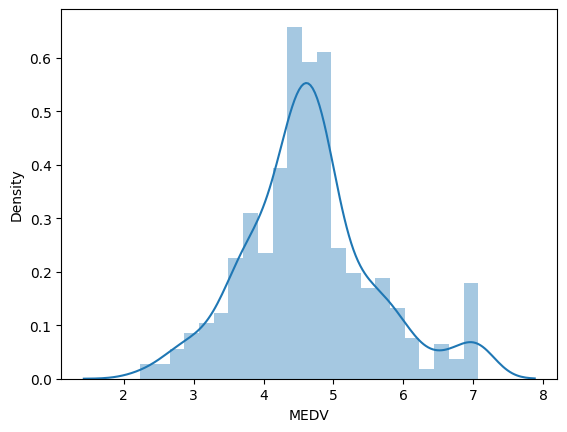

In [14]:
sqrt_tran = np.sqrt(boston_data.MEDV)
sns.distplot(sqrt_tran)

In [15]:
normaltest(sqrt_tran)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

The pvalue is still low, so we will perform the final transformation method that is *__boxcox__* transformation. 

Usually the exponent is 0.5 for the sqrt fn, but the boxcox is used to get the data as close to the normal distribution by varying exponents.

<Axes: ylabel='Density'>

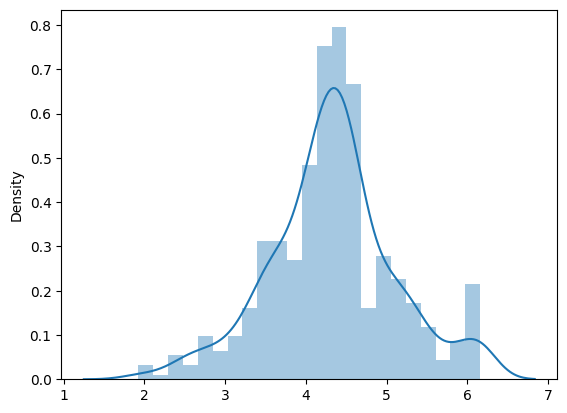

In [16]:
bc_result, lam = boxcox(boston_data.MEDV)
sns.distplot(bc_result)

In [17]:
normaltest(bc_result)

NormaltestResult(statistic=4.513528743199032, pvalue=0.10468867097426256)

Conclusion: The pvalue is > 0.05, so the data is normally distributed and we fail to reject the null hypothesis.

In [18]:
lam

0.21662091178859486

# Testing Regression

In [20]:
linearReg = LinearRegression()

In [21]:
X = boston_data.drop('MEDV', axis=1)
Y = boston_data.MEDV

Create Polynomial Features for the X

In [25]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [26]:
X.shape

(506, 13)

In [27]:
X_pf.shape

(506, 104)

### Split the data into training and test


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, Y, test_size=0.3, random_state=45)

#### Normalize the training data using ```StandardScaler()``` function. on ```X_train```. Use ```fit_transform()``` function

In [29]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [31]:
X_train_s.shape

(354, 104)

We need to normalize the target variable i.e., ```MEDV```

In [32]:
y_train_bc, lam = boxcox(y_train)

As before, We will now:

* Fit regression
* Transform testing data
* Predict on testing data

In [35]:
linearReg.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = linearReg.predict(X_test_s)

In [36]:
y_pred_bc

array([4.46637909, 5.41104743, 4.82248681, 4.54682742, 5.94104729,
       3.74822425, 4.15095895, 4.14597061, 5.1333069 , 4.30129761,
       2.66411978, 4.19255772, 6.04147794, 4.48947591, 4.20234918,
       2.61794213, 4.96401624, 5.57563961, 2.88426191, 4.89478147,
       4.21459797, 4.29027279, 4.79144313, 5.44759096, 4.27442984,
       4.77013761, 4.71704778, 2.8134032 , 4.83677809, 4.25314024,
       4.57493444, 2.9096788 , 5.33923322, 4.83128286, 6.24272293,
       5.00115687, 5.95163769, 3.43707862, 5.18284752, 5.52454019,
       3.82558016, 4.37755364, 4.0179318 , 5.20254975, 4.27078634,
       3.26623688, 4.90371269, 4.91560857, 4.23759258, 4.40720538,
       6.39737984, 4.41671533, 4.7428522 , 5.85892558, 3.44881142,
       5.20844229, 2.97993357, 3.74573619, 4.19363165, 4.21828135,
       3.29863143, 3.60128738, 5.67149749, 5.40010534, 3.90746331,
       2.43492133, 6.2968081 , 6.27312091, 5.22102843, 4.17537909,
       6.81613883, 4.41179445, 4.68943427, 3.3483878 , 3.78793

These are transformed values, but we need the non-transformed values for the y_predicted. 

We will use the inverse tranformations of the boxcox i.e., ```inv_boxcox()```

In [37]:
from scipy.special import inv_boxcox

The lam we got earlier will be used her to find the inverse of all predicted values

In [38]:
y_pred_tran = inv_boxcox(y_pred_bc, lam)
r2_score(y_test, y_pred_tran)

0.8783056245111108

We found 87% accuracy in the r2 metrics